In [1]:
from collections import defaultdict
import functools
from glob import glob
import os
import re

import numpy as np
from matplotlib import pylab as plt
import torch
try:
    import tqdm
    progress = tqdm.tqdm
except ModuleNotFoundError:
    progress = lambda x, *args : x

from odenet import refine_train
from odenet import ode_models
from odenet import datasets
from odenet import odenet_cifar10
from odenet import plotting
from odenet import helper

In [2]:
import importlib
importlib.reload(refine_train)
importlib.reload(ode_models)
importlib.reload(odenet_cifar10)
importlib.reload(datasets)

<module 'odenet.datasets' from '/home/ubuntu/afq/ODENet/odenet/datasets.py'>

In [3]:
legend_name = lambda fname : re.search(r"ARCH(.*)", fname)[1]

In [14]:
dirs = glob('results/*CIFAR*[*')
dirs = sorted(dirs, key = lambda x : os.stat(x).st_mtime)[:]
results = { name: torch.load(name) for name in dirs }
dirs

['results/odenet-CIFAR10-SingleSegment-ARCH-16-False-SkipInit-rk4_classic-2-1.0-1-piecewise-LEARN-0.05-200-[]-0.0-Backprop-NormalInit-SEED-1.pkl',
 'results/odenet-CIFAR10-SingleSegment-ARCH-16-False-SkipInit-rk4_classic-2-1.0-1-piecewise-LEARN-0.05-200-[5, 10]-0.0-Backprop-NormalInit-SEED-1.pkl']

# Just stating the latest loaded plots

results/odenet-CIFAR10-SingleSegment-ARCH-16-False-SkipInit-rk4_classic-2-1.0-1-piecewise-LEARN-0.05-200-[]-0.0-Backprop-NormalInit-SEED-1.pkl 0.907 0.98472
results/odenet-CIFAR10-SingleSegment-ARCH-16-False-SkipInit-rk4_classic-2-1.0-1-piecewise-LEARN-0.05-200-[5, 10]-0.0-Backprop-NormalInit-SEED-1.pkl 0.9184 0.99592


(0.75, 1)

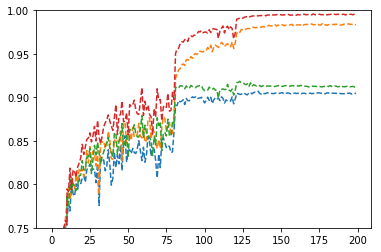

In [18]:
for name, result in results.items():
    #plt.plot(result.train_acc, label=legend_name(name))
    x,y = zip(*result.test_acc)
    plt.plot(x,y, '--', label=legend_name(name))
    x,y = zip(*result.train_acc)
    plt.plot(x,y, '--', label=legend_name(name))
    print((name),
          max(list(zip(*result.test_acc))[1]),
          max(list(zip(*result.train_acc))[1]))
    plt.vlines([],0,1)
plt.ylim(0.75,1)
#plt.legend(loc=(0,-0.4))

# Plots for Adjoint performance

In [119]:
def legend_name(fname):
    mat = re.search(r".*(euler|rk4_classic)-([0-9])-.*([0-9])-piecewise.*(Adjoint|Backprop).*-NormalInit", fname)
    return mat[1], mat[2], mat[3], mat[4]
for name, result in results.items():
    print(legend_name(name), "|", np.average(result.epoch_times), "s")

('euler', '3', '1', 'Adjoint') | 38.42834640858928 s
('euler', '3', '1', 'Backprop') | 21.879973527300173 s
('rk4_classic', '3', '1', 'Adjoint') | 122.81955647047144 s
('rk4_classic', '3', '1', 'Backprop') | 81.08864413612756 s
('euler', '3', '2', 'Adjoint') | 74.04074851822807 s
('euler', '3', '2', 'Backprop') | 41.41832183889346 s
('rk4_classic', '3', '2', 'Adjoint') | 243.42318007686407 s
('rk4_classic', '3', '2', 'Backprop') | 160.0495218519587 s
('euler', '3', '3', 'Adjoint') | 110.48584595067659 s
('euler', '3', '3', 'Backprop') | 61.47795980782248 s
('rk4_classic', '3', '3', 'Adjoint') | 364.5325963456533 s
('rk4_classic', '3', '3', 'Backprop') | 239.33918789246817 s


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


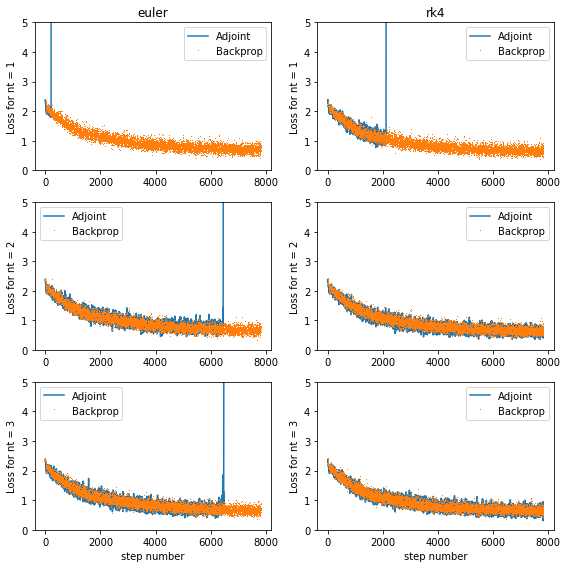

In [124]:
plt.figure(figsize=(8,8))
for i,(name, result) in enumerate(results.items()):
    if "euler" in name:
        horiz = 0
    else:
        horiz = 1
    if "-1-" in name:
        vert = 0
    elif "-2-" in name:
        vert = 1
    else:
        vert = 2

    plt.subplot(3,2,1+horiz+2*vert)
    if horiz==0 and vert==0:
        plt.title("euler")
    if horiz==1 and vert==0:
        plt.title("rk4")
    if vert==2:
        plt.xlabel("step number")
    plt.ylabel(f"Loss for nt = { vert+1}")
    plt.plot(result.losses,
             '-' if "Adjoint" in name else ',',
             label="Adjoint" if "Adjoint" in name else "Backprop")
    #plt.vlines(result.refine_steps, 0,1, linestyle='dashed')
    plt.legend()
    plt.ylim(0.,5)
plt.tight_layout()


results/odenet-CIFAR10-SingleSegment-ARCH-16-False-SkipInit-euler-3-1.0-1-piecewise-LEARN-0.1-20-[]-0.0-Adjoint-NormalInit-SEED-1.pkl (19, 0.1)
results/odenet-CIFAR10-SingleSegment-ARCH-16-False-SkipInit-euler-3-1.0-1-piecewise-LEARN-0.1-20-[]-0.0-Backprop-NormalInit-SEED-1.pkl (19, 0.774)
results/odenet-CIFAR10-SingleSegment-ARCH-16-False-SkipInit-rk4_classic-3-1.0-1-piecewise-LEARN-0.1-20-[]-0.0-Adjoint-NormalInit-SEED-1.pkl (19, 0.1)
results/odenet-CIFAR10-SingleSegment-ARCH-16-False-SkipInit-rk4_classic-3-1.0-1-piecewise-LEARN-0.1-20-[]-0.0-Backprop-NormalInit-SEED-1.pkl (19, 0.7928)
results/odenet-CIFAR10-SingleSegment-ARCH-16-False-SkipInit-euler-3-1.0-2-piecewise-LEARN-0.1-20-[]-0.0-Adjoint-NormalInit-SEED-1.pkl (19, 0.1)
results/odenet-CIFAR10-SingleSegment-ARCH-16-False-SkipInit-euler-3-1.0-2-piecewise-LEARN-0.1-20-[]-0.0-Backprop-NormalInit-SEED-1.pkl (19, 0.795)
results/odenet-CIFAR10-SingleSegment-ARCH-16-False-SkipInit-rk4_classic-3-1.0-2-piecewise-LEARN-0.1-20-[]-0.0-Adjo

(0.0, 1)

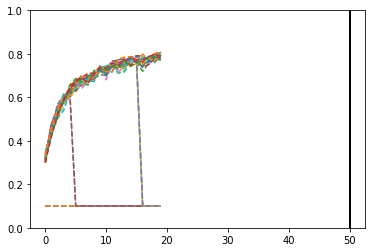

In [78]:
for name, result in results.items():
    #plt.plot(result.train_acc, label=legend_name(name))
    x,y = zip(*result.test_acc)
    plt.plot(x,y, '--', label=legend_name(name))
    x,y = zip(*result.train_acc)
    plt.plot(x,y, '--', label=legend_name(name))
    print((name), max(result.test_acc))
    plt.vlines([50,],0,1)
plt.ylim(0.,1)
#plt.legend(loc=(0,-0.4))

# Manifestation Invariance

In [15]:
refset,trainset,trainloader,testset,testloader = \
    datasets.get_dataset("CIFAR10",root='../data/')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [29]:
def set_ode_config(model, n_steps, scheme, use_adjoint=False):
    for net_idx in range(len(model.net)):
        try:
            model.net[net_idx].set_n_time_steps(n_steps)
            model.net[net_idx].scheme = scheme
        except AttributeError:
            pass

In [26]:
from SimDataDB import SimDataDB

This function is permanantly cached with a database. Delete the database to refresh the cache.

In [27]:
sdb = SimDataDB("results/manifestation_study.sqlite")

In [28]:
@sdb.Decorate(
    "fmnist",
    [("network","STRING"),("scheme","STRING"),("num_time","INT"),],
    [("train_acc","INT")])
@torch.no_grad()
def calc_acc_for_scheme_nt(name, scheme, nt):
    mod = results[name].model_list[-1]
    mod.eval()
    set_ode_config(mod, nt, scheme)
    return [refine_train.calculate_accuracy(mod, testloader)]

CREATE TABLE IF NOT EXISTS fmnist ( network STRING, scheme STRING, num_time INT, train_acc INT, timestamp VARCHAR(30), runtime FLOAT );


Here we query/populate the database and pack it into nested dictionaries.

In [62]:
test_sweep = defaultdict( lambda : {} )
with torch.no_grad():
    for name, result in results.items():
        accs_for_scheme = {}
        for scheme in ('euler', 'midpoint','rk4'):
            accs = []
            for nt in progress(range(1, 21, 1), f"{legend_name(name)}, {scheme}"):
                accs.append((nt, calc_acc_for_scheme_nt(name, scheme, nt)[0]))
            accs_for_scheme[scheme] = accs
        test_sweep[name].update(accs_for_scheme)
test_sweep

-16-False-SkipInit-rk4_classic-1-1.0-1-piecewise-LEARN-0.01-100-[50]-0.1-Backprop-NormalInit-SEED-1.pkl, euler:   5%|▌         | 1/20 [00:01<00:33,  1.74s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet-CIFAR10-SingleSegment-ARCH-16-False-SkipInit-rk4_classic-1-1.0-1-piecewise-LEARN-0.01-100-[50]-0.1-Backprop-NormalInit-SEED-1.pkl', 'euler', 1, 0.3043, datetime.datetime(2020, 5, 11, 6, 45, 47, 496583), 1.7270071506500244]


-16-False-SkipInit-rk4_classic-1-1.0-1-piecewise-LEARN-0.01-100-[50]-0.1-Backprop-NormalInit-SEED-1.pkl, euler:  10%|█         | 2/20 [00:04<00:37,  2.09s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet-CIFAR10-SingleSegment-ARCH-16-False-SkipInit-rk4_classic-1-1.0-1-piecewise-LEARN-0.01-100-[50]-0.1-Backprop-NormalInit-SEED-1.pkl', 'euler', 2, 0.6311, datetime.datetime(2020, 5, 11, 6, 45, 49, 239074), 2.900270938873291]


-16-False-SkipInit-rk4_classic-1-1.0-1-piecewise-LEARN-0.01-100-[50]-0.1-Backprop-NormalInit-SEED-1.pkl, euler:  15%|█▌        | 3/20 [00:09<00:49,  2.89s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet-CIFAR10-SingleSegment-ARCH-16-False-SkipInit-rk4_classic-1-1.0-1-piecewise-LEARN-0.01-100-[50]-0.1-Backprop-NormalInit-SEED-1.pkl', 'euler', 3, 0.7812, datetime.datetime(2020, 5, 11, 6, 45, 52, 155846), 4.721383810043335]


-16-False-SkipInit-rk4_classic-1-1.0-1-piecewise-LEARN-0.01-100-[50]-0.1-Backprop-NormalInit-SEED-1.pkl, euler:  15%|█▌        | 3/20 [00:12<01:09,  4.06s/it]


KeyboardInterrupt: 

And take the dictionaries, loaded into memory, to generate all of the plots

In [63]:
for name, accs_for_scheme in test_sweep.items():
    print(name)
    for scheme, accs in accs_for_scheme.items():
        x,y = zip(*accs)
        #if scheme in name:
        #    plt.semilogx(1.0/x[0],y[0],'o')
        # plt.vlines([3.0],0,1,linestyle='dotted')
        # plt.plot(x, y, label=scheme)

        if scheme in name:
            plt.hlines([y[7]],0,20.0, linestyles='dotted')
        # plt.semilogx([1.0/_x for _x in x], y, '+-', label=scheme)
        plt.plot(x, y, '+-', label=scheme)
    #plt.vlines([1.0/8.0],0,1,linestyles='dotted')
    plt.vlines([2.0],0,1,linestyles='dotted')
    plt.ylim(0.89,0.925)
    plt.legend()
    plt.xlabel('Time-step size in post-training inference')
    plt.ylabel('Test set accuracy')
    plt.show()

In [133]:
result.model_list[0].net[2].net.L1.weight.shape

torch.Size([2, 8, 8, 3, 3])

results/odenet-CIFAR10-SingleSegment-ARCH-16-False-SkipInit-rk4_classic-2-1.0-1-piecewise-LEARN-0.05-200-[]-0.0-Backprop-NormalInit-SEED-1.pkl


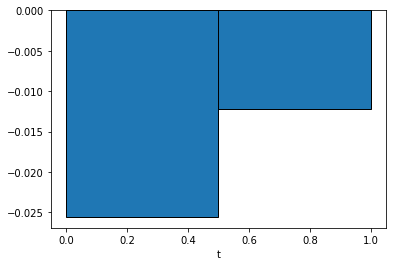

results/odenet-CIFAR10-SingleSegment-ARCH-16-False-SkipInit-rk4_classic-2-1.0-1-piecewise-LEARN-0.05-200-[5, 10]-0.0-Backprop-NormalInit-SEED-1.pkl


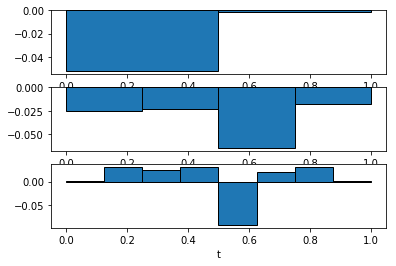

In [19]:
for name,result in results.items():
    i,j=0,0
    for a,b in [(2,2)]: #np.ndindex(result.model_list[0].net[2].net.L1.weight.shape[-2:]):
        print(name)
        plotting.plot_weights_over_time(
            result.model_list,
            lambda x : x.net[4].net.L1.weight[:,i,j,a,b].cpu(),
            lambda x : x.net[4].ts.cpu())


# Adjoint accuracy

In [64]:
criterion = torch.nn.CrossEntropyLoss()

In [65]:
def get_flat_grad(model):
    return torch.cat([ l.grad.flatten() for l in model.parameters() ])
def grad_wrt(model):
    model.zero_grad()
    out = model(imgs)
    L = criterion(out,labels)
    L.backward()
    return get_flat_grad(model)

In [69]:
name, result = next(iter(results.items()))

In [70]:
model = result.model_list[-1]
device = helper.which_device(model)
imgs, labels = next(iter(testloader))
imgs = imgs.to(device)
labels = labels.to(device)

In [90]:
name

'results/odenet-CIFAR10-SingleSegment-ARCH-16-False-SkipInit-rk4_classic-1-1.0-1-piecewise-LEARN-0.01-100-[50]-0.1-Backprop-NormalInit-SEED-1.pkl'

In [72]:
auto_grad

tensor([-0.0428, -0.0359, -0.0679,  ...,  0.0033, -0.0067, -0.0251],
       device='cuda:0')

In [103]:
nts = range(1,10)
approxes = {}
set_ode_config(model, 2, 'rk4_classic', False)
auto_grad = grad_wrt(model)
denominator = np.linalg.norm(auto_grad.cpu().numpy())
for scheme in ['rk4_classic', 'euler']:
    approxes[scheme] = []
    for i in nts:
        set_ode_config(model, i, scheme, True)
        approx_grad = grad_wrt(model)
        err = np.linalg.norm((auto_grad - approx_grad).cpu().numpy())/denominator
        approxes[scheme].append(err)

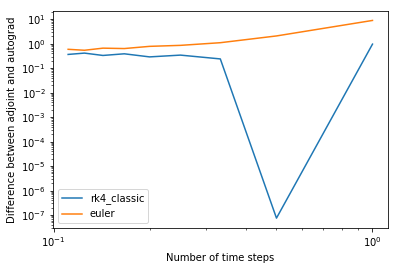

In [104]:
for scheme, approx in approxes.items():
    plt.loglog([1.0/_t for _t in nts],approx,label=scheme)
plt.xlabel("Number of time steps")
plt.ylabel("Difference between adjoint and autograd")
plt.legend()

In [95]:
approxes

{'rk4_classic': [0.9612521,
  7.302864e-08,
  0.23930673,
  0.34233332,
  0.28953344,
  0.387224,
  0.331518,
  0.41345862,
  0.3651575],
 'euler': [3.862687,
  9.624391e-08,
  0.780233,
  0.77960616,
  0.89037,
  0.86943847,
  0.9286262,
  0.9085805,
  0.9435202]}

In [105]:
nts = range(1,10)
approxes = {}

denominator = np.linalg.norm(auto_grad.cpu().numpy())
for scheme in ['rk4_classic', 'euler']:
    approxes[scheme] = []
    for i in nts:
        set_ode_config(model, i, scheme, False)
        auto_grad = grad_wrt(model)
        set_ode_config(model, i, scheme, True)
        approx_grad = grad_wrt(model)
        err = np.linalg.norm((auto_grad - approx_grad).cpu().numpy())/denominator
        approxes[scheme].append(err)

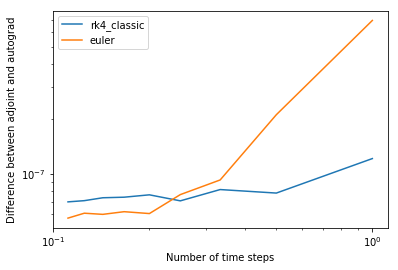

In [106]:
for scheme, approx in approxes.items():
    plt.loglog([1.0/_t for _t in nts],approx,label=scheme)
plt.xlabel("Number of time steps")
plt.ylabel("Difference between adjoint and autograd")
plt.legend()